# Conhecendo a base de dados

## Importando os dados


In [48]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

dados = pd.read_csv(url,delimiter=';')

pd.DataFrame(dados)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [49]:
# 

dados[['Tipo','Quartos','Valor']]

,Tipo,Quartos,Valor
0,Quitinete,1,1700.0
1,Casa,2,7000.0
2,Conjunto Comercial/Sala,0,5200.0
3,Apartamento,1,800.0
4,Apartamento,1,800.0
...,...,...,...
32955,Quitinete,0,800.0
32956,Apartamento,3,1800.0
32957,Apartamento,2,1400.0
32958,Apartamento,2,3000.0


## Características gerais da base de dados

In [50]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [51]:
dados.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [52]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [53]:
medio_aluguel = dados[['Tipo','Valor']].groupby('Tipo').mean(numeric_only = True) # esse numeric_only ele considera só valores numericos
medio_aluguel['Valor'] = round(medio_aluguel['Valor'],2)
medio_aluguel = medio_aluguel.sort_values('Valor', ascending= False)





In [54]:
pd.DataFrame(medio_aluguel)

,Valor
Tipo,
Prédio Inteiro,498637.24
Indústria,120000.00
Galpão/Depósito/Armazém,53407.06
Terreno Padrão,32567.71
Hotel,25000.00
Loteamento/Condomínio,22000.00
Conjunto Comercial/Sala,14715.05
Casa Comercial,14478.26
Loja/Salão,13769.65


<AxesSubplot: ylabel='Tipo'>

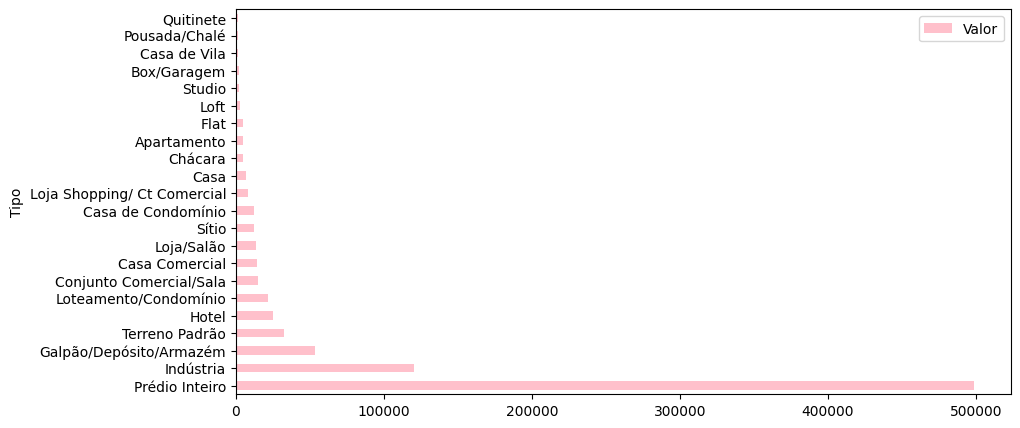

In [55]:
medio_aluguel.plot(kind='barh',figsize=(10,5),color = 'pink')

## Removendo os imóveis comerciais

In [56]:
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [57]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']


In [58]:
medio_aluguel.query('@imoveis_comerciais in Tipo')

,Valor
Tipo,
Prédio Inteiro,498637.24
Indústria,120000.00
Galpão/Depósito/Armazém,53407.06
Terreno Padrão,32567.71
Hotel,25000.00
Loteamento/Condomínio,22000.00
Conjunto Comercial/Sala,14715.05
Casa Comercial,14478.26
Loja/Salão,13769.65


In [59]:
medio_aluguel.query('@imoveis_comerciais not in Tipo')

,Valor
Tipo,
Casa de Condomínio,11952.06
Casa,6793.45
Apartamento,4744.61
Flat,4546.19
Loft,2557.88
Studio,2400.00
Casa de Vila,1574.37
Quitinete,1246.84


In [60]:
medio_aluguel_filtrado = medio_aluguel.query('@imoveis_comerciais not in Tipo')

In [61]:
medio_aluguel_filtrado

,Valor
Tipo,
Casa de Condomínio,11952.06
Casa,6793.45
Apartamento,4744.61
Flat,4546.19
Loft,2557.88
Studio,2400.00
Casa de Vila,1574.37
Quitinete,1246.84


<AxesSubplot: ylabel='Tipo'>

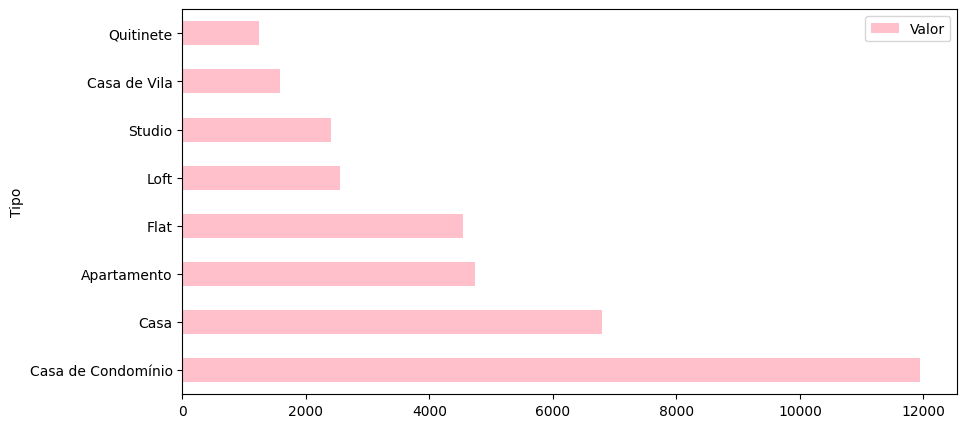

In [62]:
medio_aluguel_filtrado.plot(kind='barh',figsize=(10,5),color = 'pink',legend= True)

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [63]:
percent_dados = dados.query('@imoveis_comerciais not in Tipo')

percent_dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [75]:
percent_tipo = percent_dados.Tipo.value_counts(normalize= True, ascending= True).to_frame()

# salvando o dataframe em uma variável
df_exemplo = percent_dados['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')

# alterando o nome da coluna "Tipo" para "Percentuais"
df_exemplo.rename(columns={'Tipo': 'Percentuais'}, inplace=True)

# visualizando o dataframe
df_exemplo 





,Percentuais
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


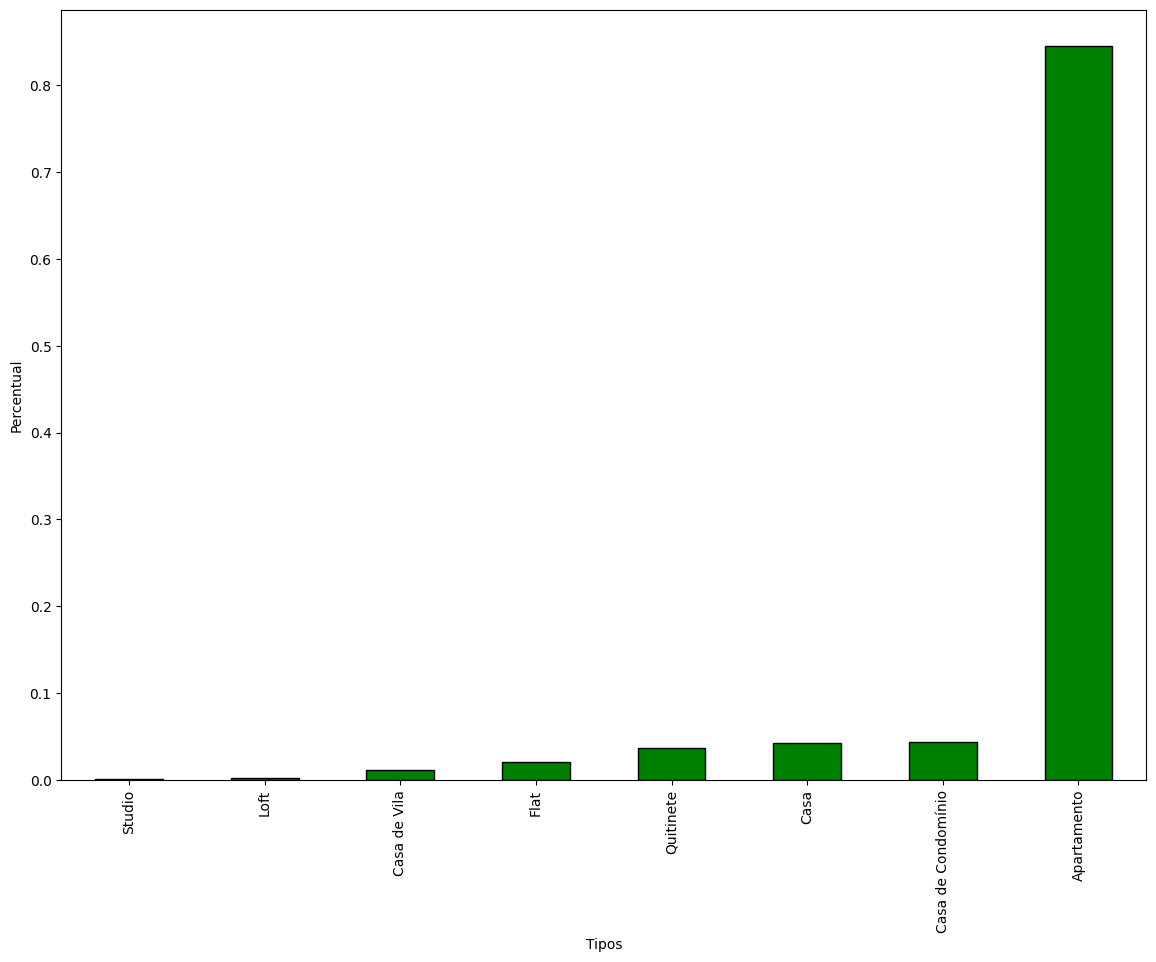

In [65]:
percent_tipo = percent_dados.Tipo.value_counts(normalize= True, ascending= True)

percent_tipo.plot(kind='bar', figsize=(14, 10), color ='green', edgecolor='black',
                        xlabel = 'Tipos', ylabel = 'Percentual');

### **Selecionando apenas os imóveis do tipo apartamento**

In [ ]:
df = dados.query('Tipo == "Apartamento"')

In [71]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


# Tratando e filtrando os dados

## Lidando com dados nulos

## Removendo registros

## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

## Salvando os dados

# Manipulando os dados

## Criando colunas numéricas

## Criando colunas categóricas